The dataset was collected via an in-game tracking system that logs player activity.
It spans from start date to end date, covering gameplay experience, subscription status, and playtime.
However, potential biases may exist, as only players who engaged with the system are included.


Players Dataset (players.csv)
Total Observations: 196

Columns and Data Types:
experience <chr>: Represents the player's level, including: Pro, Veteran, Regular, Amateur, and beginner.
subscribe <lgl>: subscribe state of game-related news (TRUE/FALSE).
hashedEmail <chr>: Players' email, encrypted by hash value.
played_hours <dbl>: Players' playtime in hours.
name <chr>: players' name.
gender <chr>: Gender, including: Male, Female, Non-binary, Prefer not to say, and Other.
Age <dbl>: Players' age.


Potential Issues:
Age has missing values.
hashedEmail is an identifier, irrelevant for analysis.
experience is categorical and may require encoding.
played_hours is continuous and may have outliers.

Sessions Dataset (sessions.csv)
Total Observations: 1,535

Columns and Data Types:

hashedEmail: <chr> Unique player identifier.
start_time:<chr> Session start time (string format).
end_time:<chr> Session end time (some missing values).
original_start_time:<dbl> Unix timestamp of session start.
original_end_time: <dbl> Unix timestamp of session end (some missing values).

Potential Issues:

end_time and original_end_time contain missing values.
Timestamps may require conversion to datetime for proper analysis.
Some players may have multiple sessions, requiring aggregation.

Question : What types of players are most likely to contribute a large amount of data?

Specific Question:
Can player characteristics (such as experience level, subscription status, and age) predict the total hours played?

This question involves:
Response Variable: played_hours (continuous)
Explanatory Variables: experience, subscribe, Age, gender

To answer the question, I will:
1.Wrangle the data by merging players.csv and sessions.csv on hashedEmail.
2.Ues graph to visualize the distribution of played_hours and relationships with categorical variables.
3.Choose an appropriate predictive method.

In [20]:
players_df <- read.csv("https://raw.githubusercontent.com/itsmurphyz/individual2.0/refs/heads/main/players.csv")
session_df <- read.csv("https://raw.githubusercontent.com/itsmurphyz/individual2.0/refs/heads/main/sessions.csv")

players_df
session_df

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [51]:
colMeans(players_df[, c("played_hours", "Age")], na.rm = TRUE)

library(dplyr)
session_duration <- session_df |>
  group_by(hashedEmail) |>
  summarise(session_duration = sum(as.numeric(difftime(end_time, start_time, units = "hours"), na.rm = TRUE)))

players_df <- left_join(players_df, session_duration, by = "hashedEmail")
colMeans(players_df[, c("played_hours", "Age", "session_duration")], na.rm = TRUE)

played_hours          Age 
    5.845918    20.520619

played_hours              Age session_duration 
        5.845918        20.520619         8.645122

Average Played Hours per Player: ~5.85 hours
Average Age of Players: ~20.52 years
Average Total Session Duration per Player: ~6.63 hours
Next, I will create visualizations to explore the distribution of played hours and how it relates to player characteristics. 

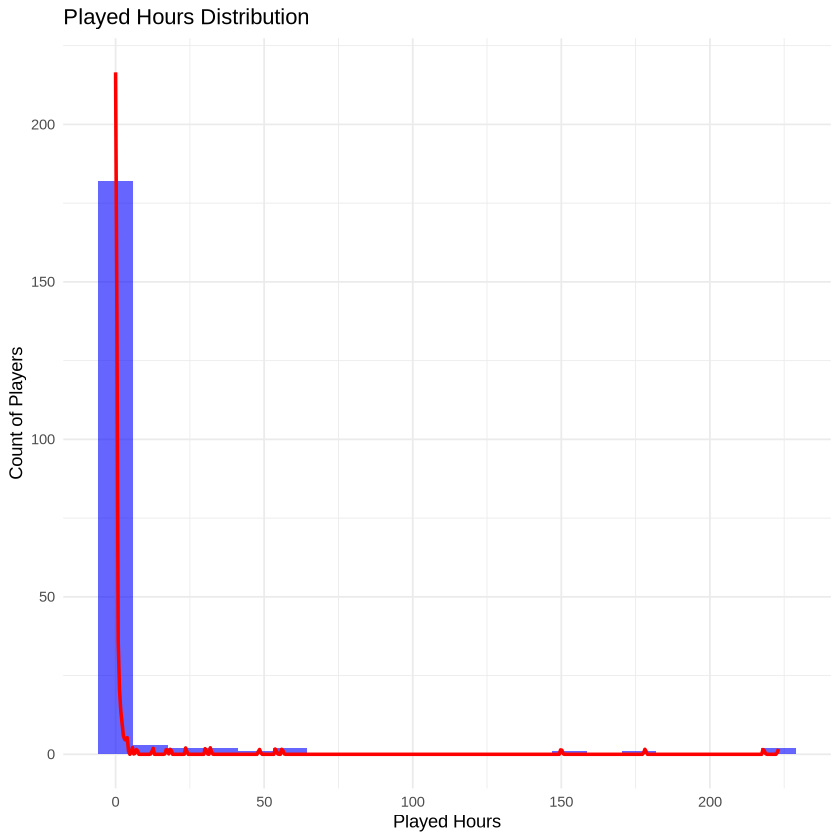

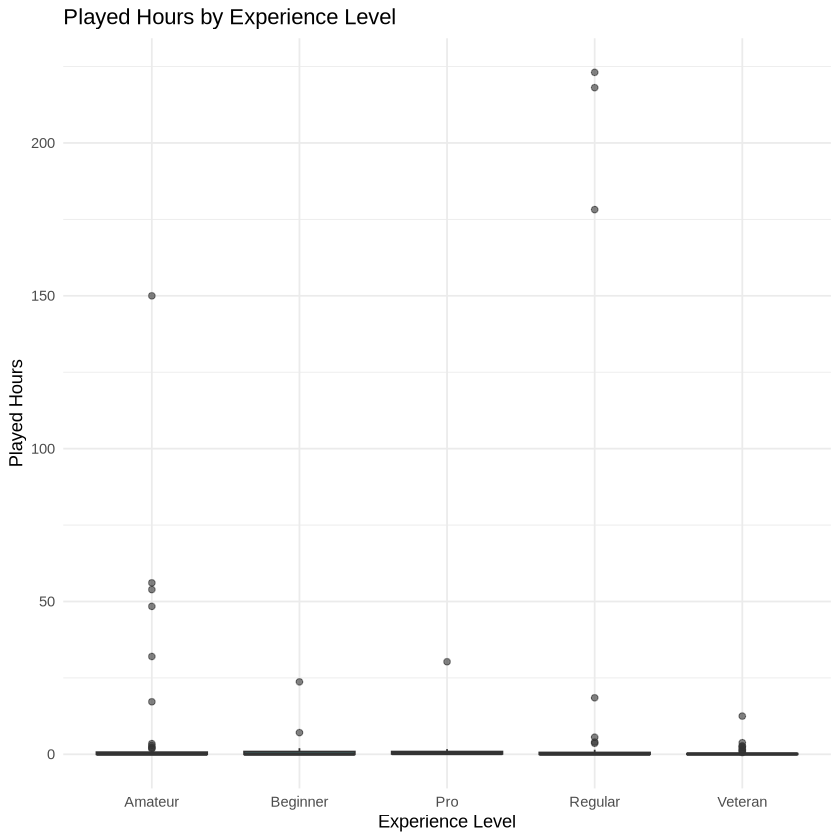

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


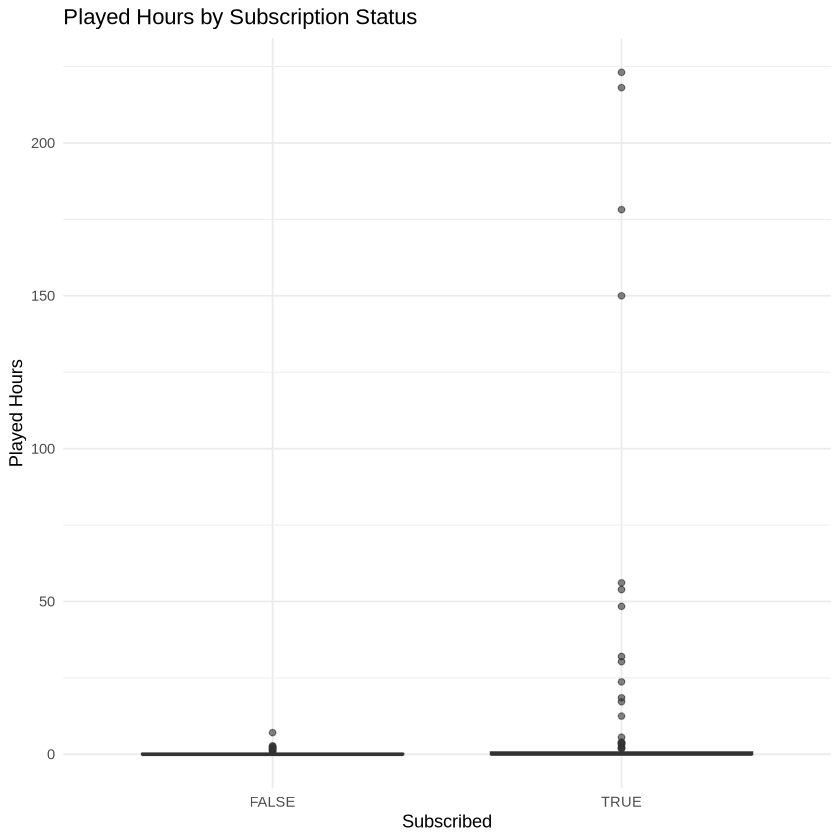

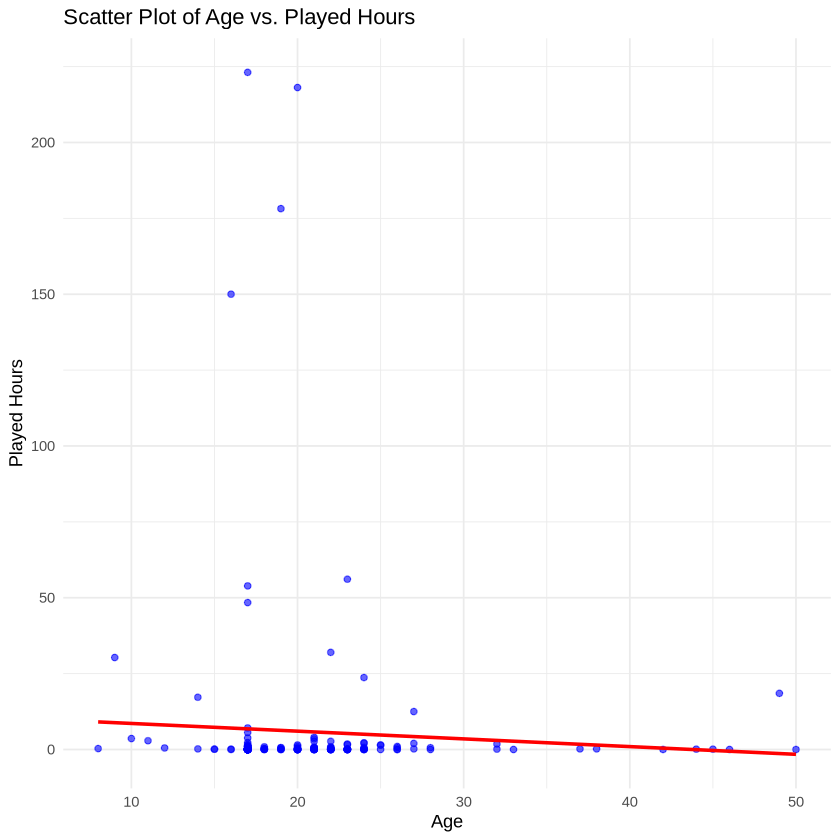

In [55]:
library(ggplot2)


# Distribution of game duration
ggplot(players_df, aes(x = played_hours)) +
  geom_histogram(bins = 20, fill = "blue", alpha = 0.6) +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  labs(title = "Played Hours Distribution", x = "Played Hours", y = "Count of Players") +
  theme_minimal()

# Game duration for different experience levels
ggplot(players_df, aes(x = experience, y = played_hours)) +
  geom_boxplot(fill = "cyan", alpha = 0.6) +
  labs(title = "Played Hours by Experience Level", x = "Experience Level", y = "Played Hours") +
  theme_minimal()

# Subscription status vs. game duration
ggplot(players_df, aes(x = as.factor(subscribe), y = played_hours)) +
  geom_boxplot(fill = "orange", alpha = 0.6) +
  labs(title = "Played Hours by Subscription Status", x = "Subscribed", y = "Played Hours") +
  theme_minimal()

# Age vs. Game Duration (Scatter chart)
ggplot(players_df, aes(x = Age, y = played_hours)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Scatter Plot of Age vs. Played Hours", x = "Age", y = "Played Hours") +
  theme_minimal()


1.Distribution of Played Hours:
The majority of players have played fewer than 10 hours.
The distribution is right-skewed, with a few players contributing significantly more hours.

2.Played Hours by Experience Level:
More experienced players (Veteran, Pro) tend to have higher played hours.
Amateur and Regular players generally have lower playtime, but there are some exceptions.

3.Played Hours by Subscription Status:
Subscribed players tend to have a wider range of played hours compared to non-subscribers.
There are some outliers among both groups, but the median played hours is higher for subscribed players.

4.Age vs. Played Hours:
No strong linear relationship is visible between age and played hours.
Some younger players have high played hours, while others do not play much.

To answer the research question, I propose using a linear regression model. Since played_hours is a continuous variable, regression models are suitable for predicting the impact of player characteristics on playtime.

Why this method?
Linear regression can quantify the effect of each feature (experience level, subscription, etc.) on playtime.
It provides interpretable results and allows us to see which variables are most strongly associated with higher playtime.

Assumptions:
Linear regression assumes a linear relationship between features and playtime.
The features should not have strong multicollinearity.

Limitations:
If there are strong interactions between variables (e.g., experience and subscription together), linear regression may not capture them well.
If the data exhibits non-linearity, a different method like random forest regression may be needed.

Data Processing Plan:
Encode categorical variables (experience, subscribe, gender).
Split the dataset into training (80%) and testing (20%).
Use cross-validation to compare models and select the best one.
Evaluate models using RMSE (Root Mean Squared Error) for regression models.